# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [21]:
#  1. Get the total rides for each city type
ride_count = pyber_data_df.groupby("type")["ride_id"].count()
ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [46]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type")["driver_count"].sum()
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [27]:
#  3. Get the total amount of fares for each city type
total_fairs = pyber_data_df.groupby("type")["fare"].sum()
total_fairs

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [30]:
#  4. Get the average fare per ride for each city type. 
average_fair = total_fairs.divide(ride_count)
average_fair

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [47]:
# 5. Get the average fare per driver for each city type. 
average_fair_per_driver = total_fairs.divide(total_drivers)
average_fair_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [94]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
          "Total Rides" : ride_count,
          "Total Drivers" : total_drivers,
          "Total Fairs": total_fairs,
          "Average Fair Per Ride": average_fair,
          "Average Fair Per Driver": average_fair_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fairs,Average Fair Per Ride,Average Fair Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [95]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fairs,Average Fair Per Ride,Average Fair Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [96]:
#  8. Format the columns.

pyber_summary_df["Total Fairs"] = pyber_summary_df["Total Fairs"].map("${:.2f}".format)

pyber_summary_df["Average Fair Per Ride"] = pyber_summary_df["Average Fair Per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fair Per Driver"] = pyber_summary_df["Average Fair Per Driver"].map("${:.2f}".format)


pyber_summary_df

,Total Rides,Total Drivers,Total Fairs,Average Fair Per Ride,Average Fair Per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [102]:
# 1. Read the merged DataFrame
pyber_data_df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [132]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

df=pyber_data_df.groupby(["date", "type"]).sum()
df

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [136]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = df.reset_index()

In [137]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table = pd.pivot_table(df,index=['date'],columns = ['type'],values=['fare'])
pivot_table#

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [162]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

df = pivot_table.loc['2019-01-01':'2019-04-28']
df

fare                
type                 Rural Suburban  Urban
date                                      
2019-01-01 00:08:16    NaN      NaN  37.91
2019-01-01 00:46:46    NaN    47.74    NaN
2019-01-01 02:07:24    NaN    24.07    NaN
2019-01-01 03:46:50    NaN      NaN   7.57
2019-01-01 05:23:21    NaN      NaN  10.75
...                    ...      ...    ...
2019-04-27 17:58:27  14.01      NaN    NaN
2019-04-27 19:45:48    NaN    28.84    NaN
2019-04-27 20:41:36    NaN      NaN   8.28
2019-04-27 23:26:03    NaN      NaN  19.06
2019-04-27 23:52:44    NaN    45.98    NaN

[2177 rows x 3 columns]

In [196]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
df.index = pd.to_datetime(df.index)

In [197]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     17 non-null     float64
 1   (fare, Suburban)  17 non-null     float64
 2   (fare, Urban)     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


In [198]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample("W").sum()
df

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1169.04  1909.51

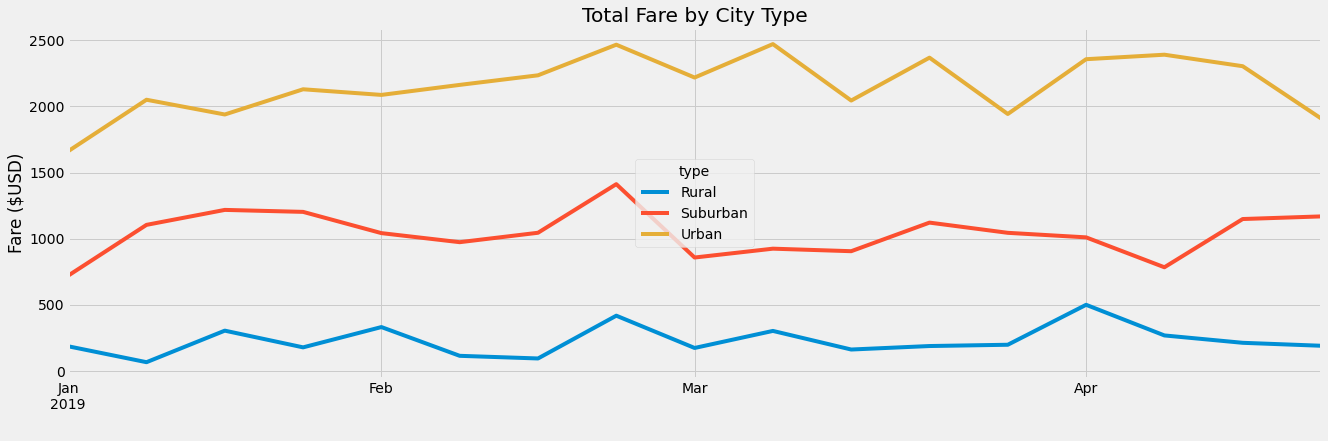

In [219]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = df.plot(figsize = (20,6))
ax.set_xlabel(" ")
ax.set_ylabel("Fare ($USD)")
plt.title("Total Fare by City Type")
ax.legend(["Rural", "Suburban", "Urban"], title = "type")

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig('PyBer_fare_summary.png')
plt.show()
